# Tellende prosjekt i ISTx1003 - 2025

I prosjektdelen av ISTx1003 Statistikk, Statistisk læring og data science, har vi fokus på tre hovedtemaer: 
regresjon, klassifikasjon og klyngeanalyse. 

Dette er oppgaveteksten til den tellende prosjektoppgaven, der besvarelsen teller 30% av karakteren i emnet.  

Veiledning av prosjektoppgaven annonseres på den eksterne kurssiden:  https://wiki.math.ntnu.no/istx100y/2025h/1003

Det må være 3-6 studenter på hver gruppe, og alle studenter må være oppmeldt i den samme emnekoden (det vil si: en av ISTA1003, ISTG1003, ISTT1003). 

Informasjon om Prosjektmodulen finnes i Blackboard, og alt kursmaterialt er på den eksterne kurssiden: https://wiki.math.ntnu.no/istx100y/2025h/1003

Oppgaven skal utføres i Python, ved hjelp av Jupyter-notatbok-versjonen av denne filen som du nå leser. Notatboken er lastet opp på Jupyterhubben, men kan også finnes på den eksterne kurssiden: https://wiki.math.ntnu.no/istx100y/2025h/1003

Det er meningen at dere skal kjøre notatboken på Jupyterhubben vår https://s.ntnu.no/isthub, eller på deres egen installasjon.

Antall spørsmålspunkter per oppgave er angitt ved hver oppgave (totalt 40 poeng). Karakteren settes med prosentvurderingsmetoden hvor poeng blir konvertert i en prosentandel (ikke-heltall prosent blir avrundet): https://innsida.ntnu.no/wiki/-/wiki/Norsk/Prosentvurderingsmetoden

Dere skal løse oppgavene med hjelp av notatboken. **!!Viktig!!**: Alle svar må gis i et separat svarark (en Word-fil, https://www.math.ntnu.no/emner/IST100x/ISTx1003/Svarark_1003.odt) som dere eksporterer og leverer som pdf. Dere kan skrive tekst eller kopiere bilder av resultatene inn i filen.

**Prosjektet leveres i Inspera, se informasjon om dette på Blackboard.**


**Frist for innlevering av prosjektet til Inspera er mandag 17.november kl 12.00.**

Kontakt eksamenskontoret ved problemer. Det kan **ikke** gis utsettelse på innleveringsfristen.

# Oppgave 1: Lineær regresjon (16 poeng)

Som dataingeniør vil du antakeligvis jobbe med mange forskjellige spennende type problemstillinger og data, som for eksempel i forskning, i finanssektoren, teknologigrupper.

I det eksempelet her ser vi på kostnader i amerikanske sykehus mellom 1989 og 1991. Spørsmålet vi stiller er: hvilke faktorene er avgjørende for å forutsi hvor mye sykehusoppholdet til en pasient koster?
 

**Oppgaven inneholder følgende elementer:**

* Laste inn og utforske et datasett
* Tilpasse en enkel lineær regresjonsmodell og diskutere denne
* Tilpasse en multippel lineær regresjonsmodell og diskutere denne

## Totale kostnader for pasienter inlagt i amerikanske sykehus (1989-1991)

* `totcst`: totale kostnader 
* `age`: alder
* `dzgroup`: sykdomsgruppe (type sykdom)
* `num.co`: antall komorbiditeter (hvor mange sykdommer noen har)
* `edu`: antall år med utdanning
* `income`: inntekt (kategorisert) 
* `scoma`: et mål for Glasgow Coma indeks (grad av våkenhet)
* `meanbp`: gjennomsnittig blodtrykk
* `hrt`: puls
* `resp`: respirasjonsfrekvens
* `temp`: kroppstemperatur
* `race`: etnisitet
* `pafi`: forhold av PaO2/FiO2 (blod/gass blanding)

In [2]:
# importere pakker og funksjoner vi trenger i oppgave 1

# generelt - numerikk og nyttige funksjoner
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Fordelinger, modeller for regresjon, qq-plott 
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as  sm

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
InteractiveShell.ast_node_interactivity = "last_expr"

## Datasettet

Vi leser inn data og skriver ut de første og siste observasjonene i datasettet, og så sjekker vi datatyper. Vi konverterer noen typer til type *category* fordi det er kategoriske variabler.

In [3]:
# Lese inn datasettet ved funksjon fra pandas  (df=data frame - vanlig navn å gi et datasett)

df = pd.read_csv("https://www.math.ntnu.no/emner/IST100x/ISTx1003/h2021/support.csv", sep = ',')

# Endre navn for å forhindre syntax problemer
df = df.rename(columns={'num.co': 'numco'})

# Skriv ut de første og siste radene
print(df)

        age            dzgroup  numco   edu      income  scoma     totcst  \
0     43.54  ARF/MOSF w/Sepsis      1   NaN         NaN     26  390460.50   
1     63.66  ARF/MOSF w/Sepsis      0  22.0    $25-$50k     26  156674.13   
2     31.84          Cirrhosis      2  16.0  under $11k      0   17528.44   
3     48.70        Lung Cancer      0  16.0         NaN      0   33002.50   
4     49.61  ARF/MOSF w/Sepsis      1  12.0    $25-$50k      0  288592.25   
...     ...                ...    ...   ...         ...    ...        ...   
8137  68.62               COPD      2  12.0  under $11k      0    1847.38   
8138  66.07  ARF/MOSF w/Sepsis      1   8.0         NaN      0   34329.31   
8139  55.15               Coma      1  11.0         NaN     41   23558.50   
8140  70.38  ARF/MOSF w/Sepsis      1   NaN         NaN      0   31409.02   
8141  81.54  ARF/MOSF w/Sepsis      1   8.0    $11-$25k      0   10605.76   

       race  meanbp    hrt  resp   temp    pafi  
0     white      67  172.

In [4]:
# Konverter dzgroup, race og income til "category", og så sjekk hvor mange personer faller i hver kategori.

df=df.astype({'dzgroup':'category','race':'category','income':'category'})
print(df["dzgroup"].value_counts())
print(df["race"].value_counts())
print(df["income"].value_counts())

dzgroup
ARF/MOSF w/Sepsis    3076
CHF                  1290
COPD                  895
Lung Cancer           825
MOSF w/Malig          613
Coma                  528
Cirrhosis             458
Colon Cancer          457
Name: count, dtype: int64
race
white       6499
black       1178
hispanic     263
other         94
asian         71
Name: count, dtype: int64
income
under $11k    2571
$11-$25k      1360
$25-$50k       942
>$50k          605
Name: count, dtype: int64


In [5]:
# Få oversikt over datasettet

df.describe()

,age,numco,edu,scoma,totcst,meanbp,hrt,resp,temp,pafi
count,8142.000000,8142.000000,6680.000000,8142.000000,8142.000000,8142.000000,8142.000000,8142.000000,8142.000000,6042.000000
mean,63.020722,1.901498,11.756587,11.648858,30865.642767,84.775608,97.709862,23.525669,37.100981,240.604037
std,15.537342,1.352183,3.429399,24.258079,45717.962369,26.725561,30.638716,9.464641,1.244434,110.482380
min,18.120000,0.000000,0.000000,0.000000,420.310000,22.000000,0.000000,0.000000,31.700000,12.000000
25%,53.250000,1.000000,10.000000,0.000000,5958.347500,63.000000,72.000000,18.000000,36.200000,155.022500
50%,65.145000,2.000000,12.000000,0.000000,14484.290000,77.000000,100.000000,24.000000,36.700000,225.220000
75%,74.400000,3.000000,14.000000,9.000000,36146.585000,107.000000,120.000000,28.000000,38.090000,306.630000
max,101.850000,9.000000,31.000000,100.000000,633212.000000,195.000000,300.000000,90.000000,41.700000,890.380000


In [6]:
# Sjekk datatyper for alle variabler 

df.dtypes

age         float64
dzgroup    category
numco         int64
edu         float64
income     category
scoma         int64
totcst      float64
race       category
meanbp        int64
hrt         float64
resp          int64
temp        float64
pafi        float64
dtype: object

Her ser vi at de fleste variablene er kontinuerlig eller heltall (int), mens dzgroup, income og race er kategoriske. Disse variablene må vi kode om med såkalt dummy-variabelkoding for at de skal bli behandlet riktig i regresjonsanalysen, men først ser vi på en enkel lineær regresjon:

## Enkel lineær  regresjon 

Vi skal starte med å se på de totale kostnadene `totcst` som responsen vi ønsker å undersøke/forklare, og vi velger variablen `age` (alder) som eneste forklaringsvariabel. Følgende er et kryssplott av `totcst` mot `age`:

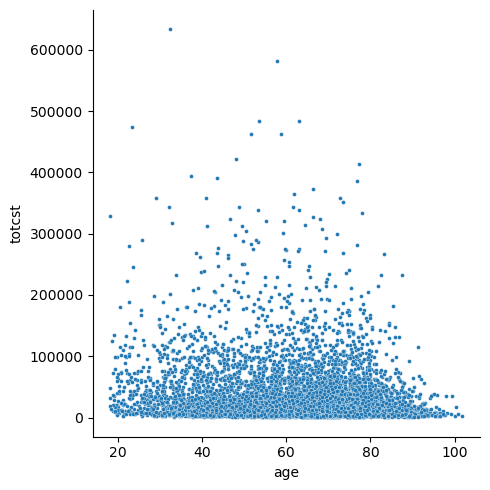

In [7]:
sns.relplot(x = 'age', y = 'totcst', kind = 'scatter', s=8, data = df)
plt.show()

### **Problem 1a)** (1P) 
Vil du konkludere med at en lineær regressjonsmodell passer bra? Hvorfor (ikke)? Maks 2 setninger.

###   <font color='red'>Løsning:</font>  Svar på svararket.

I vår tilfelle er det lurt å transformere én eller flere variabler. Som statistiker vet vi at en logaritmisk transformasjon ofte hjelper. Vi tar logaritmen av responsen og ser på kryssplottet igjen:

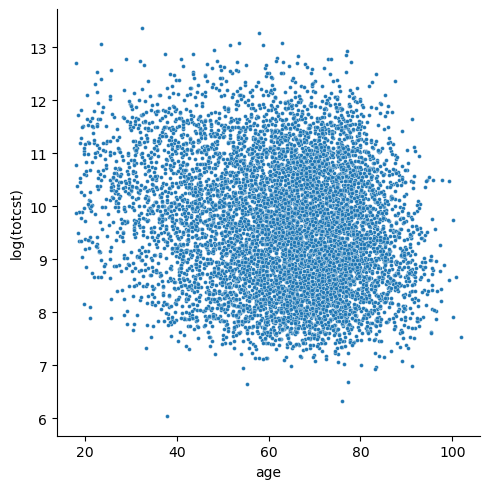

In [8]:
# Vi lager en ny variabel som er log(totcst):
df['logtotcst'] = np.log(df['totcst'])
sns.relplot(x = 'age', y = 'logtotcst', kind = 'scatter', s=8, data = df)
plt.ylabel("log(totcst)")
plt.xlabel("age")

plt.show()

### **Problem 1b)** (1P) 
Sammenlign den nye grafen (med log(totcost) som respons) med den gamle grafen lengre opp. Passer en lineær regresjonsmodell bedre nå? Maks 2 setninger.

###   <font color='red'>Løsning:</font>  Svar på svararket.

Uavhengig av hva du svarte under b) skal vi nå tilpasse en enkel lineær modell med `logtotcst` som respons og `age` som forklaringsvariabel. For å oppsummere det vi har snakket om i undervisningen, så består en (enkel og multippel) lineær regresjonsanalyse av følgende steg:
    
* Steg 1: Bli kjent med dataene ved å se på oppsummeringsmål og ulike typer plott
* Steg 2: Spesifiser en matematisk modell (med modellformel)
* Steg 3: Initialiser og tilpass modellen
* Steg 4: Presenter resultatene fra modellen som ble tilpasset
* Steg 5: Evaluer om modellen passer til dataene

Vi har nå gjort Steg 1, og nede finner du kode for å gjøre steg 2-4. Studer og kjør koden.

In [9]:
# kodechunk Steg2-4

# Steg 2: spesifiser matematisk modell i Python
formel='logtotcst ~ age'

# Steg 3: Initaliser og tilpass en enkel lineær regresjonsmodell
# først initialisere
modell = smf.ols(formel,data=df)
# deretter tilpasse
resultat = modell.fit()

# Steg 4: Presenter resultater fra den tilpassede regresjonsmodellen
print(resultat.summary())

                            OLS Regression Results                            
Dep. Variable:              logtotcst   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     273.6
Date:                Tue, 14 Oct 2025   Prob (F-statistic):           1.83e-60
Time:                        09:28:04   Log-Likelihood:                -12832.
No. Observations:                8142   AIC:                         2.567e+04
Df Residuals:                    8140   BIC:                         2.568e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.4962      0.054    193.713      0.0

Nå skal vi studere resultatene fra `resultat.summary()`, og vi refererer til *øvre panel* som linjene mellom første og andre doble strek ==== (dette er delen som starter med Dep.Variable), *midtre panel*, og *nedre panel* (som starter med Omnibus). 

### **Problem 1c)** (2P) 

   (i) Skriv ned ligningen for den estimerte regresjonsmodellen (se midtre panel).
   
   (ii) Se på det øvre panelet og rapporter $R^2_{adj}$ og gi en tolking av verdien (er den stor/liten, hva betyr det her?). 
   
   
###   <font color='red'>Løsning:</font> Svar på svararket.
   
   
 

 Vi kan nå også plotte den estimerte regresjonslinjen i kryssplott. 

<AxesSubplot:xlabel='age', ylabel='logtotcst'>

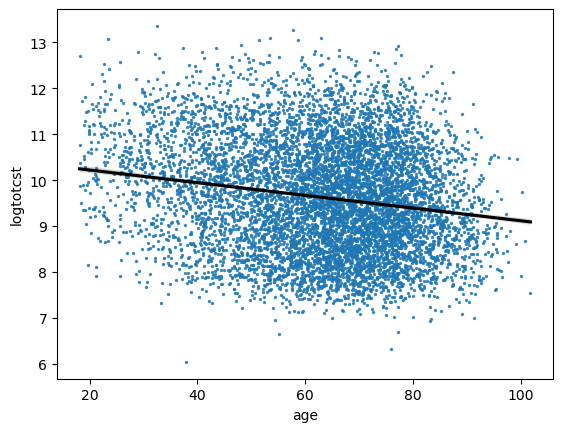

In [10]:
sns.regplot(x=df['age'],y=df['logtotcst'],line_kws={"color": "black"},scatter_kws={"s":2})

### **Problem 1d)** (3P)

 (i) Vi ser at for `age` er `coef` lik -0.0138 (dette er $\hat\beta_1$). Forklar dette tallet til en sykehusansatt som ikke har hørt om enkel lineær regresjon. Er kostnadene høyere eller lavere for eldre pasienter? Maks 2 setninger.

 (ii) Oppgi 95% konfidensintervallet for $\hat\beta_{1}$. Forklar hva det betyr til din kollega som jobber på sykehuset med maks 2 setninger.

 (iii) Hva er $p$-verdien for $\hat\beta_{1}$? Forklar om vi kan være sikker på at alderen har en lineær sammenhang med `logtotcost`. Hvorfor, eller hvorfor ikke? 


###   <font color='red'>Løsning:</font>  Svar på svararket.



En viktig steg når vi tilpasser en modell er å sjekke om modellen faktisk passer, ellers kan vi ende med feil konklusjoner!

For å sjekke modellantakelser ser vi på følgende plot:

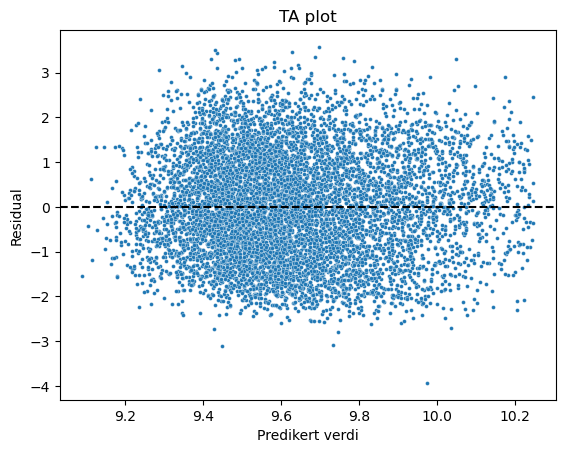

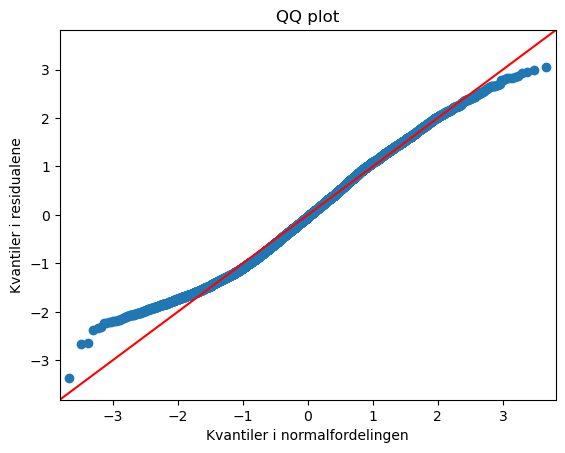

In [11]:
# kodechunk Steg5

# Steg 5: Evaluer om modellen passer til dataene
# Plotte predikert verdi mot residual 
sns.scatterplot(x=resultat.fittedvalues, y=resultat.resid,s=8)
plt.ylabel("Residual")
plt.xlabel("Predikert verdi")
plt.axhline(y=0, color='black', linestyle='--')
plt.title("TA plot")
plt.show()

# Lage kvantil-kvantil-plott for residualene
sm.qqplot(resultat.resid,line='45',fit=True)
plt.ylabel("Kvantiler i residualene")
plt.xlabel("Kvantiler i normalfordelingen")
plt.title("QQ plot")
plt.show()

### **Problem 1e)** (3P)

(i) (1P) Studer plottet av predikert verdi mot residual (Tukey-Anscombe (TA) plot) og QQ-plottet. Vurderer du at modellantagelsene er oppfylt? Gi en kort begrunnelse der du tolker begge plottene.

(ii) (2P) Generer de samme to plottene når vi bruker `totcst` uten log-transformasjon `formel='totcst ~ age'` i en enkel lineær regresjon (kopier python koden fra steg 2-5 og se på TA- og QQ-plott). Er modellantakelsene oppfylt her? Forklar.

###   <font color='red'>Løsning:</font>  Svar på svararket.

## Multippel lineær regresjon

For å bedre kunne predikere de totale kostnadene for en pasient, er det lurt å inkludere flere forklaringsvariabler i regresjonsanalysen.

En rekke plott vises nå: kryssplott, tetthetsplott (som er en glattet versjon av et histogram) og boksplott. For tetthetsplott og boksplott deler vi dataene inn etter sykdomsgruppe for å undersøke om sykdomstype påvirker effekten som alder og numco har på kostnadene (logtotcst).

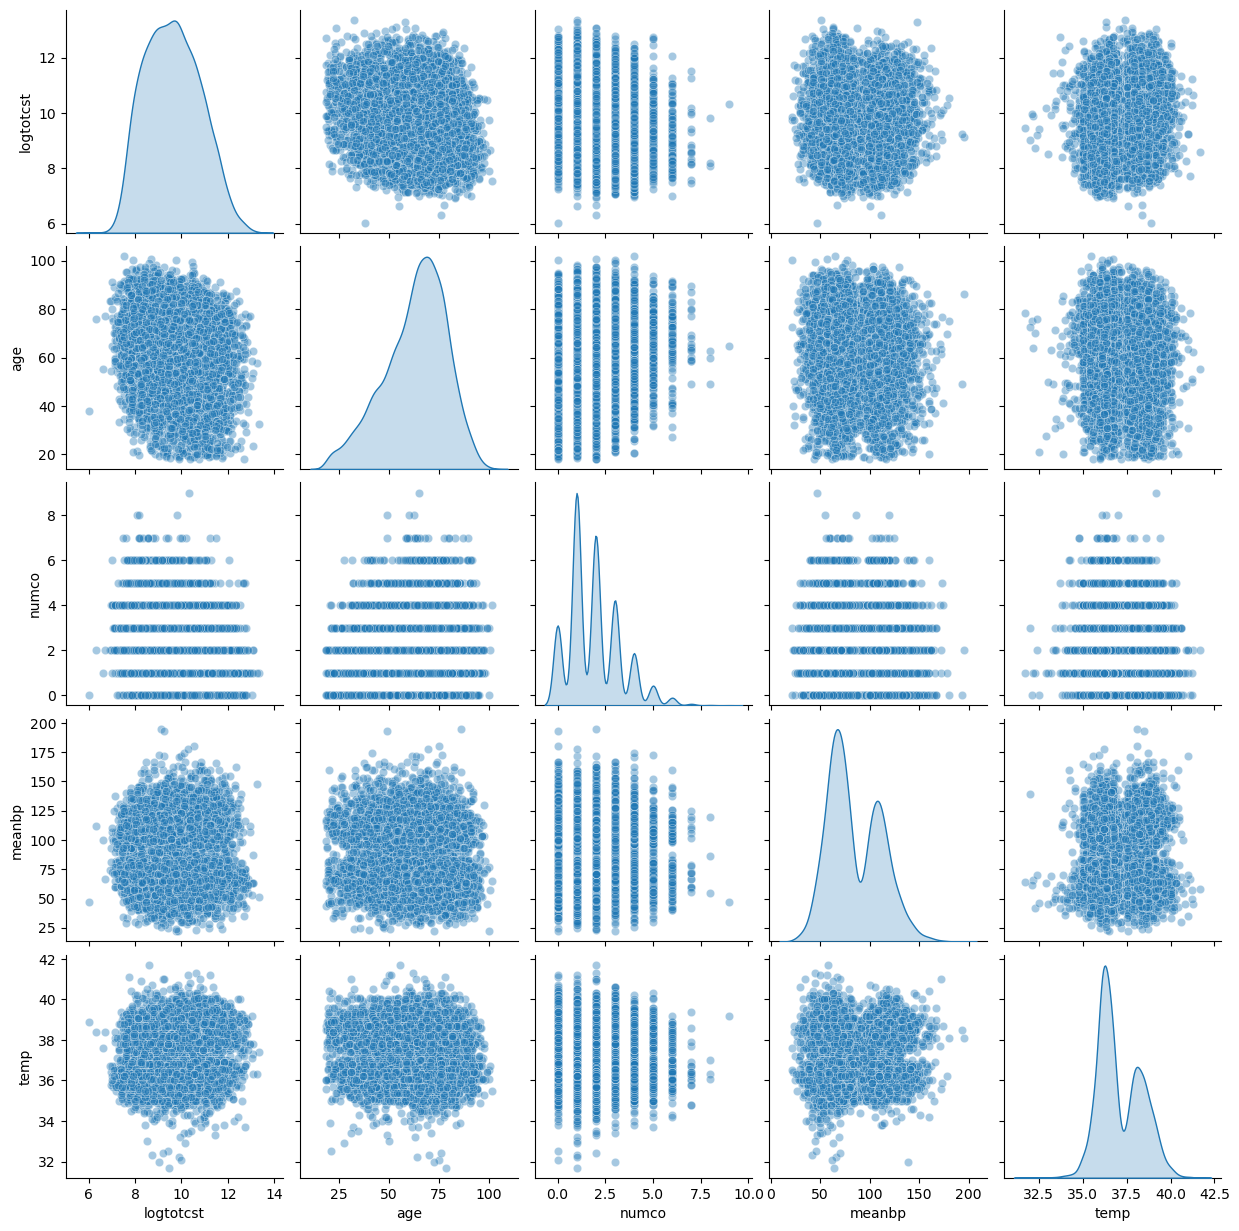

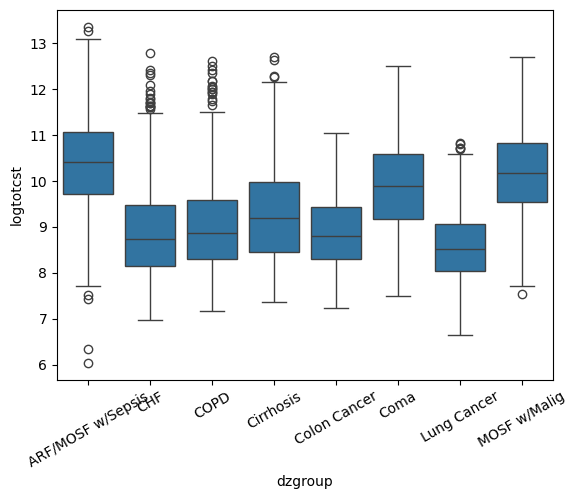

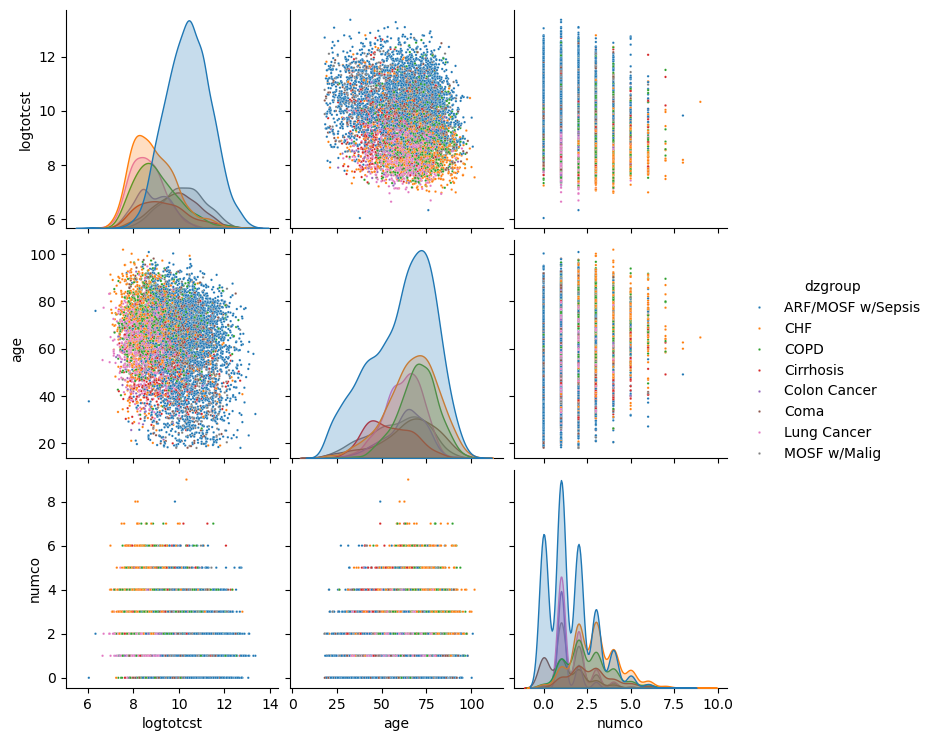

In [12]:
# Kryssplott av logtotcst mot age, numco, meanbp og temp
# På diagonalen er glattede histogrammer (tetthetsplott) av  logtotcst, age, numco, meanbp og temp
sns.pairplot(data=df, vars = ['logtotcst','age','numco','meanbp','temp'],
             diag_kind = 'kde',
             plot_kws=dict(alpha=0.4))
plt.show()

# Boksplott av logtotcst for hver sykdomsgruppe

ax = sns.boxplot(x="dzgroup", y="logtotcst", data=df)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.setp(ax.get_xticklabels(), rotation=30)

plt.show()

sns.pairplot(df, vars = ['logtotcst','age','numco'],
             hue = 'dzgroup', 
             diag_kind = 'kde',
             plot_kws={"s":3})
plt.show()

Vi skal nå tilpasse en multippel lineær regresjon med (igjen) `logtotcst` som respons. Vi tar med forklaringsvariablene `age`, `numco`, `meanbp`, `temp` og `dzgroup`. 

 
### **Problem 1f)** (4P)

(i) Utfør regresjonen på nytt med den nye modellformelen (som er gitt nede) ved å kopiere inn akkurat samme kode for steg 3, 4 og 5. 

(ii) Hvor mange regresjonsparametere er estimert? 

(iii) Hvis vi sammenligner en person som er innlagt med Lung Cancer (lungekreft) med en person med COPD (lungesykdommen kols), som begge er like gamle, har samme antall comorbiditeter (`numco`), samme gjennomsnittig blodtrykk (`meanbp`) og samme kroppstemperatur, hvilken pasient har de høyeste forventede kostnadene? Forklar.

(iv) Hva er de predikerte kostnadene på den originale skalaen (altså `totcst`, ikke `logtotcst`!) for en pasient på 50 år med Colon Cancer, en comorbiditet (numco=1), meanbp=130 og temp=36.2? Regn for hånd ved å sette inn tall fra resultat.summary() og vis din beregning.


###   <font color='red'>Løsning:</font> Svar på svararket.



In [13]:
# Steg 2:

formel='logtotcst ~ age + dzgroup + numco  +  meanbp + temp'

# kopier inn akkurat samme kode som i steg 3, 4 og 5

### **Problem 1g)** (2P)

(i) Forklaringsvariablen `dzgroup` er kategorisk og vi har brukt en såkalt dummy-variabelkoding, der 'ARF/MOSF w/Sepsis' er referansekategorien. Er effekten av de andre sykdomgruppene på `logtotcst` forskjellig fra effekten for referansekategorien? Forklar. 

(ii) Hva er andel forklart variasjon? Sammenlign med verdien du fant i Problem 1c(iii). Var det en god idé å bruke multippel lineær regresjon, eller var enkel lineær regresjon godt nok?


###   <font color='red'>Løsning:</font> Svar på svararket.

# Oppgave 2: Klassifikasjon (14 poeng)
## Del 1: Logistisk regresjon

Et populært eksempel innen klassifikasjon er implementeringen av et spamfilter. Det er noe de fleste av oss kjenner til, men har du noen gang spurt deg selv hvordan det egentlig fungerer?

Her bruker vi et datasett med 5 575 SMS-meldinger som allerede er klassifisert som enten «spam» eller «ham». Dataene er hentet fra:

https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection

og den originale studien finner du her: https://dl.acm.org/doi/10.1145/2034691.2034742

Dette er til informasjon. Du trenger ikke laste noe ned eller lese dette, du får alt du trenger her i oppgaveteksten.

I denne oppgaven skal vi tilpasse en logistisk regresjonsmodell for å lage et spamfilter. 


In [14]:
# Vi begynner igjen med å importere pakker og funksjoner vi trenger i oppgaven

import pandas as pd
import numpy as np
import random

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


from sklearn.model_selection import train_test_split, cross_val_score

# plotting
import matplotlib.pyplot as plt

## Spamfilter datasett

Først leser vi inn datasettet. Vi gir nye navn til kolonnene (som skal hete 'y' og 'tekst'), koder om 'spam' til '1' og 'ham' til '0', og ser på innholdet av datasettet.


In [15]:
# Lese inn datasettet ved en funksjon fra pandas  (df=data frame - vanlig navn å gi et datasett)
df = pd.read_csv('https://www.math.ntnu.no/emner/IST100x/ISTx1003/h2021/SMSSpamCollection.txt', delimiter='\t',header=None)

# Gi nye navner til den første kolonnen (slik at den heter 'y') og den andre kolonnen (som skal hete 'text').
# y er den binære responsen som koder y=1 for "spam" og y = 0 for "ham" (=ikke spam) 
# Kolonnen 'text' inneholder SMS teksten 

df = df.rename(columns={0: 'y', 1: 'text'})

# Vi bytter at spam er 1 og ham er 0
df['y'] = df['y'].map({'spam': 1, 'ham': 0}).astype(int)

print(df)

      y                                               text
0     0  Go until jurong point, crazy.. Available only ...
1     0                      Ok lar... Joking wif u oni...
2     1  Free entry in 2 a wkly comp to win FA Cup fina...
3     0  U dun say so early hor... U c already then say...
4     0  Nah I don't think he goes to usf, he lives aro...
...  ..                                                ...
5567  1  This is the 2nd time we have tried 2 contact u...
5568  0               Will ü b going to esplanade fr home?
5569  0  Pity, * was in mood for that. So...any other s...
5570  0  The guy did some bitching but I acted like i'd...
5571  0                         Rofl. Its true to its name

[5572 rows x 2 columns]


### **Problem 2a)** (2P)

 (i) Hvor mange av SMS meldingene er spam og hvor mange er ham? Tips: Bruk en funksjon du har sett i oppgave 1 som heter `value_counts()`. 
 
 (ii) Lag et histogram for responsen $y$ ved bruk av `plt.hist()` funksjonen.

###   <font color='red'>Løsning:</font> Svar på svararket.

### Trening, validerings og testsett

Før vi fortsetter med modelleringen, skal vi dele datasettet i tre deler: et treningssett, et valideringssett og et testsett. Vi bestemmer oss her for å legge 70 % av dataene i treningssettet, og 15% i både validerings- og testsettet.

In [16]:
# Først del dataene i trenings og testsett (70-30%)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df['text'],df['y'],test_size=0.3,random_state=10)

# Og så del testsettet igjen i et test- og et valideringssett slik at begge inneholder 15% (50% av de 30%)
X_test_raw, X_val_raw, y_test, y_val = train_test_split(X_test_raw,y_test,test_size=0.5,random_state=10)

Husk hvorfor vi må dele datasettet i disse ulike delene. Sjekk forelesningsmaterialet hvis du har glemt det.


## Logistisk regresjon


I undervisningen har vi lært at logistisk regresjon trenger forklaringsvariabler. Med to forklaringsvariabler $x_1$ og $x_2$, for eksempel, kan vi modellere sannsynligheten for en "suksess" (e.g., at en SMS melding er spam) som
$$p_i = \frac{\exp(\beta_0 + \beta_1 x_{1i} + \beta_2 x_{2i})}{ 1 + \exp(\beta_0 + \beta_1 x_{1i} + \beta_2 x_{2i})} \ .$$



### **Problem 2b)** (1P)

I dette eksempelet har vi en datasett med 'text' som mulige forklaringsvariable. Er dette et problem? Forklar med maks 2 setninger.

###   <font color='red'>Løsning:</font> Svar på svararket.


For at Python skal kunne arbeide med tekstmeldingene, må vi vektorisere dataene. Hva betyr det? Jo, det innebærer at vi registrerer hvert ord og hvor ofte ordet forekommer i hver SMS. Vi oppretter en matrise der hver kolonne representerer et ord, og skriver inn «1» i matrisen hvis ordet finnes i SMS-en som står i den aktuelle raden (eller «2» hvis ordet forekommer to ganger, osv.), ellers «0».

Vektoriseringen vil derfor produsere en matrise med veldig mange nuller – det finnes mange ulike ord, og de aller fleste forekommer ikke i en gitt SMS-tekst. Derfor kan vi komprimere matrisen ganske mye.

Alt dette kan vi gjøre ved hjelp av følgende kode:

In [17]:
# Vektorisering av SMS tekstene
vect = CountVectorizer()
vect.fit(X_train_raw)
x_train = vect.transform(X_train_raw)
x_test = vect.transform(X_test_raw)
x_val = vect.transform(X_val_raw)

In [18]:
# Hva betyr dette? x_train, x_test og x_val er nå komprimerte matriser, 
# hvor hver rad er en SMS og hver kolonne er et ord som finnes i de ulike SMS-meldingene. 

# Dette er komprimerte matriser, og derfor er det litt vanskelig å se på dem.
# Men vi kan prøve å se litt på en dekomprimert versjon av x_train her:
# (Obs! Men vi skal fortsette med de komprimerte versjonene x_train, x_test, x_val etterpå)
type(x_train)
print(pd.DataFrame(x_train.toarray()))

      0     1     2     3     4     5     6     7     8     9     ...  7176  \
0        0     0     0     0     0     0     0     0     0     0  ...     0   
1        0     0     0     0     0     0     0     0     0     0  ...     0   
2        0     0     0     0     0     0     0     0     0     0  ...     0   
3        0     0     0     0     0     0     0     0     0     0  ...     0   
4        0     0     0     0     0     0     0     0     0     0  ...     0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
3895     0     0     0     0     0     0     0     0     0     0  ...     0   
3896     0     0     0     0     0     0     0     0     0     0  ...     0   
3897     0     0     0     0     0     0     0     0     0     0  ...     0   
3898     0     0     0     0     0     0     0     0     0     0  ...     0   
3899     0     0     0     0     0     0     0     0     0     0  ...     0   

      7177  7178  7179  7180  7181  7182  7183  718

### Problem 2c) (1P)

Hvor mange SMS-meldinger er det i treningsdatasettet? Hvor mange forskjellige ord finnes i disse meldingene?

###   <font color='red'>Løsning:</font> Svar på svararket.


Okei... nå har vi egentlig et problem, for vi har flere forklaringsvariabler (altså flere forskjellige ord!) enn observasjoner. Vi har ikke snakket om hvordan man bruker logistisk regresjon i et slikt tilfelle, så dere trenger ikke å forstå nøyaktig hvordan det fungerer eller hva som faktisk skjer når vi tilpasser en logistisk regresjonsmodell. (Vi bruker noe som kalles regularisering, men som sagt er det utenfor pensum.)

Det viktigste er at vi gjennomfører en logistisk regresjon med binær respons: y=0 for «ham» og  y=1 for «spam».
Det gjør vi nå for treningsdatasettet:

In [19]:
# Tilpass en logistisk regression med treningsdata:

lr = LogisticRegression(penalty='l2')
lr.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [21]:
## Og nå kan vi utregne feilraten på treningssettet:

lrscore = lr.score(x_train,y_train)
print('Logistic regression feilrate: ',round(1-lrscore,5))

Logistic regression feilrate:  0.00231


### Problem 2d) (2P)

 (i) Hvor stor er andelen av SMS-meldingene som er riktig klassifisert i treningssettet?
 
 (ii) Er feilraten i valideringssettet større eller mindre enn i treningssettet, og hvorfor? For å finne ut, kopier koden hvor vi har regnet ut feilrate på treningssettet, og erstatt trenings- med valideringssettet. Viktig: Bruk modellen som du har tilpasset til treningssettet!
 

###   <font color='red'>Løsning:</font> Svar på svararket.  (Gjerne også kopier et bilde av koden og resultatet fra jupyter notebooken.)


Vi har lært i undervisningen at logistisk regresjon predikerer sannsynligheten $p_i$ for at $y_i=1$. Klassifiseringsregelen som brukes er å forutsi $\hat{y}_i = 1$ hvis $p_i>0.5$ og ellers $y_i = 0$. Det er akkurat det som scorefunksjonen som brukes ovenfor (`lr.score`) faktisk gjør. Valget av 0.5 er imidlertid vilkårlig, og det kan være at en annen cutoff ville gi bedre prediksjoner.

### Problem 2e) (3P)

 (i) Bruk igjen modellen over som du har tilpasset til treningsdatasettet, men bruk alle cutoff-verdier 0.1, 0.2, ... 0.9 for å klassifisere observasjonene i valideringssettet (se og kjør kode under). Hvilken cutoff fungerer best og hva er den tilsvarende feilraten på valideringssettet?
 
 (ii) Nå kan du bruke den beste cutoff-verdien og regne ut feilraten på testsettet. Tilpass koden.
 
 (iii) Hvorfor er det ikke rart at testsettet gir en litt høyere feilrate enn på både trenings og valideringssettet? Maks 2 setninger.
 
###   <font color='red'>Løsning:</font> Svar på svararket.  (Gjerne også kopier et bilde av koden og resultatet fra jupyter notebooken.)


In [22]:
# For å få sannsynlighet P(y=1) for at en SMS var spam
val_prob = lr.predict_proba(X=x_val)[:,[1]]

# Og nå klassifiser med forskjellige cutoff verdier mellom 0.1 og 0.9:
for x in np.arange(0.1, 1.0, 0.1):
    cutoff = x
    # Prediker spam eller ham avhengig av P(y=1)
    y_valpred = np.where(val_prob > cutoff, 1, 0)

    # Finn andel korrekte klassifikasjoner
    print("cutoff:", round(x,1), "Accuracy:", round(accuracy_score(y_true=y_val, y_pred=y_valpred),5),
      "Feilrate:", round(1-accuracy_score(y_true=y_val, y_pred=y_valpred),5))

cutoff: 0.1 Accuracy: 0.97727 Feilrate: 0.02273
cutoff: 0.2 Accuracy: 0.98325 Feilrate: 0.01675
cutoff: 0.3 Accuracy: 0.98206 Feilrate: 0.01794
cutoff: 0.4 Accuracy: 0.97727 Feilrate: 0.02273
cutoff: 0.5 Accuracy: 0.97847 Feilrate: 0.02153
cutoff: 0.6 Accuracy: 0.97727 Feilrate: 0.02273
cutoff: 0.7 Accuracy: 0.97727 Feilrate: 0.02273
cutoff: 0.8 Accuracy: 0.9701 Feilrate: 0.0299
cutoff: 0.9 Accuracy: 0.96053 Feilrate: 0.03947



## Del 2: $k$-nærmeste-nabo-klassifikasjon (KNN)

Spamfiltereksempelet kan dessverre ikke brukes til KNN-klassifikasjon. Problemet skyldes noe som kalles the curse of dimensionality, som oppstår når vi har for mange forklaringsvariabler (se https://en.wikipedia.org/wiki/Curse_of_dimensionality).

Vi skal derfor bruke et annet datasett, der vi ønsker å predikere om en person kjøper en campingvognforsikring eller ikke, avhengig av 85 forklaringsvariabler. Datasettet, som består av 5 822 observasjoner, er en del av ISLR-pakken i R. Mer informasjon finner du her: https://liacs.leidenuniv.nl/~puttenpwhvander/library/cc2000/data.html 

Forsikringsselskapet ønsker å bruke prediksjonsmodellen til å velge ut potensielle kunder de kan ringe, slik at de får solgt flere forsikringer uten å kontakte for mange personer.


In [23]:
# Vi begynner igjen med å importere pakker og funksjoner vi trenger i oppgaven

import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Trening og testsett, evaluering av klassifikasjonsmetoder 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

## Caravan datasettet

In [24]:
df = pd.read_csv('https://www.math.ntnu.no/emner/IST100x/ISTx1003/h2021/Caravan.csv', delimiter=',')

df.shape
df.describe

<bound method NDFrame.describe of        MOSTYPE  MAANTHUI   MGEMOMV  MGEMLEEF  MOSHOOFD    MGODRK    MGODPR  \
0     0.680848 -0.272557  0.406662 -1.216859  0.779338 -0.694251  0.217425   
1     0.992212 -0.272557 -0.859426 -1.216859  0.779338  0.302526 -0.365379   
2     0.992212 -0.272557 -0.859426 -1.216859  0.779338 -0.694251 -0.365379   
3    -1.187335 -0.272557  0.406662  0.010754 -0.970896  1.299302 -0.948183   
4     1.225735 -0.272557  1.672750 -1.216859  1.479432  0.302526 -0.365379   
...        ...       ...       ...       ...       ...       ...       ...   
5817  0.914371 -0.272557 -2.125514 -1.216859  0.779338 -0.694251  0.800229   
5818  0.836530 -0.272557  1.672750  1.238367  0.779338  0.302526 -0.365379   
5819  0.680848 -0.272557  0.406662  1.238367  0.779338 -0.694251  0.800229   
5820  0.758689 -0.272557  0.406662 -1.216859  0.779338 -0.694251  1.383033   
5821  0.680848 -0.272557  0.406662  0.010754  0.779338 -0.694251  0.800229   

        MGODOV    MGODGE    M

In [25]:
# Vi erstatter Yes/No variablen med 1/0 
#df.replace(('Yes', 'No'), (1, 0), inplace=True)
#df['Purchase'] = df['Purchase'].replace({'Yes': 1, 'No': 0}).astype(int)
df['Purchase'] = df['Purchase'].map({'Yes': 1, 'No': 0}).astype(int)

# Se på antall kjøpere i datasettet. 
# Vi ser at bare en liten andel av mulige kunder faktisk kjøper en forsikring:
print(df['Purchase'].value_counts())
 

Purchase
0    5474
1     348
Name: count, dtype: int64


### Problem 2f) (1P)

Hva er _andelen_ av kunder som faktisk kjøper en forsikring?
 
###   <font color='red'>Løsning:</font> Svar på svararket.

Vi fortsetter med å dele datasettet inn i et trenings- og valideringssett (vi lager ikke noe testsett for å ikke gjøre oppgaven for vanskelig).

In [26]:
# Del dataene i et trenings- og et valideringssett (60-40%)
df_tren, df_val = train_test_split(df, test_size = 0.4,random_state=1,stratify=df['Purchase'])

X_tren = df_tren.drop('Purchase',axis=1)
X_val = df_val.drop('Purchase',axis=1)

Og så tilpasser vi en $k$-nærmeste-nabo (KNN) klassifikasjon med $k$=1. Deretter ser vi på feilraten og forvirringsmatrisen for valideringssettet:

In [27]:
# Start med k=1
k=1
knn = KNeighborsClassifier(n_neighbors=k,p=2) 
knn.fit(X_tren, df_tren['Purchase'])

# Feilrate på testsettet (1-score):
1-knn.score(X_val, df_val['Purchase'])

# Forvirringsmatrise: 
pd.DataFrame(
    confusion_matrix(y_true=df_val['Purchase'], y_pred=knn.predict(X_val)), 
    index=['true:no', 'true:yes'], 
    columns=['pred:no', 'pred:yes']
)


,pred:no,pred:yes
true:no,2087,103
true:yes,121,18


In [28]:
# Se på antall kjøpere og ikke-kjøpere i valideringssettet: 

print(df_val["Purchase"].value_counts())

Purchase
0    2190
1     139
Name: count, dtype: int64


### Problem 2g) (2P)

(i) Vi antar at alle kunder som predikeres som kjøpere i valideringssettet **(pred:yes)** deretter blir kontaktert av en selger. Hva er andelen av kundene som blir kontaktert som faktisk kjøper en forsikring? Se på forvirringsmatrisen over, hvor vi har brukt $k=1$, og vis din beregning.

(ii) Sammenlign andelen fra (i) med andelen kjøpere i valideringssttet. Har suksesraten blitt bedre, sammenlignet med et tilfeldig utvalg av kunder fra valideringssettet? Kommentér.
 
###   <font color='red'>Løsning:</font> Svar på svararket.

Til slutt tilpasser vi KNN med $k=1,3,\ldots,11$. Deretter beregner vi feilraten på valideringssettet og visualiserer den i et plott.

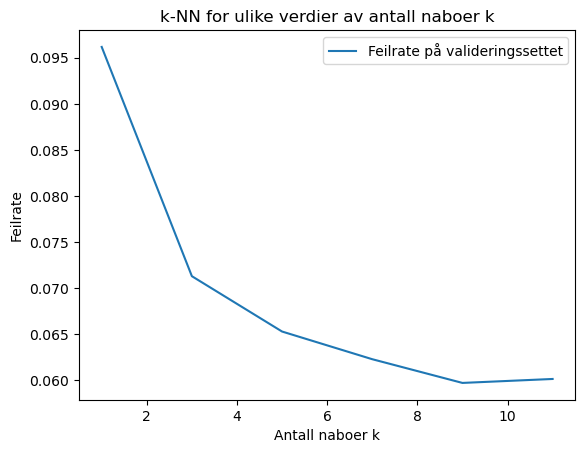

Valideringsfeilrate:
[[ 1.          0.09617862]
 [ 3.          0.07127523]
 [ 5.          0.06526406]
 [ 7.          0.06225848]
 [ 9.          0.05968227]
 [11.          0.06011164]]


In [29]:
knaboer = np.arange(1,12,step=2)
val_feilrate = np.empty(len(knaboer))


for i,k in enumerate(knaboer):
    
#Initialiser kNN med  k neighbors
    knn = KNeighborsClassifier(n_neighbors=k,p=2) # p=2 gir euklidsk avstand

# Tilpass modellen med treningssettet
    knn.fit(X_tren, df_tren['Purchase'])
    
# Beregn feilrate på valideringssett
# Score er accuracy= "andel korrekt"
    val_feilrate[i] = 1 - knn.score(X_val, df_val['Purchase'])
    
# Lage plott
plt.title('k-NN for ulike verdier av antall naboer k')
plt.plot(knaboer, val_feilrate, label='Feilrate på valideringssettet')
plt.legend()
plt.xlabel('Antall naboer k')
plt.ylabel('Feilrate')
plt.show()

valres=np.vstack((knaboer, val_feilrate))
print("Valideringsfeilrate:")
print(valres.T)

### Problem 2h) (2P)

(i)  Velg $k$ med den minste feilraten og beregn forvirringsmatrise for valideringssettet (bruke samme code some for $k=1$ oppover).

(ii)  Er det lurt å bruke denne $k$-verdien? Hvorfor (ikke)?
 
###   <font color='red'>Løsning:</font> Svar på svararket.

# Oppgave 3: Klyngeanalyse (10 poeng)


### Oppgaven inneholder følgende elementer:
* Last inn et datasett og undersøk innholdet.  
* Bruk $K$-gjennomsnitt-klyngeanalyse får å finne klynger i bilder av håndskrevne tall (0-9). 
* Diskuter resultatene av klyngeanalysen.
* Diskutere $K$-gjennomsnitt-klyngeanalyse vs. hierarkisk klynganalyse.
* Kommenter resultatene fra en hierarkisk klyngeanalyse.

## Finn klynger (struktur) i bildene av håndskrevne tall

Et stort felt innen maskinlæring er bildegjenkjenning (image recognition) og klassifisering. Dette innebærer at vi laster inn et bilde i en statistisk algoritme og får tilbake en etikett som beskriver hva bildet forestiller – for eksempel en person, et tall eller en sykdom.

I dette eksempelet skal vi jobbe med data fra *mnist* (Modified National Institure of Standards and Technology) databasen, som for eksempel finnes her: https://www.kaggle.com/c/digit-recognizer. Datasettet inneholder digitaliserte bilder av håndskrevne sifre (0–9), og brukes ofte til å trene maskinlæringsalgoritmer for klassifikasjon. Det betyr at man ønsker å forutsi hvilket tall et gitt bilde viser, slik at datamaskinen kan lese tall – for eksempel postnummeret på et brev.

Her bruker vi datasettet til noe annet: Vi vil undersøke om vi finner struktur i bildene ved bruk av en klyngeanalyse. Vi vil jo kanskje håpe at de samme sifrene kommer til å bli gruppert i en klynge fordi de inneholder lignende mønstre. Her skal vi se om det er sant. 

Vi har lært om to populære algoritmer som brukes til å lage klynger av objekter: 

   * $K$-gjennomsnitt ($K$-means) algoritmen: Målet med denne algoritmen er å plassere de individuelle observasjonene i $K$ grupper (kalt klynger) basert på observasjonenes avstand til grupper av andre observasjoner. Algoritmen kjøres iterativt, og stoppes når alle observasjoner som ligner hverandre er plassert i en gruppe (klynge) sammen.
   * Hierarkisk klyngeanalyse (se nedenfor).
  


In [30]:
# importere pakker og funksjoner vi trenger i oppgave 3
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans  # k-gjennomsnitt klyngeanalyse

from scipy.cluster.hierarchy import dendrogram, linkage

from matplotlib.offsetbox import OffsetImage, AnnotationBbox

## Les inn datasettet

Vi begynner med å lese inn datasettet som inneholder digitaliserte, håndskrevne sifre. Hvert siffer er plassert i en firkant på 
$28\cdot 28$ = 784 piksler, og hvert bilde kan dermed representeres som en vektor ned lengde 784.


In [31]:
## Les inn datasettet og se på de første 5 eksempler

images = pd.read_csv('https://www.math.ntnu.no/emner/IST100x/ISTx1003/h2021/images.csv', sep = ",", index_col = 0)

images.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V775,V776,V777,V778,V779,V780,V781,V782,V783,V784
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Å skrive ut headeren gir ikke noe spesielt interessant. Pikslene i disse bildene er gitt som tall mellom 0 og 255 (gråskala), der 0 representerer helt svart og 255 helt hvitt. Pikslene som er vist ovenfor, tilsvarer det øverste venstre hjørnet av bildet og det nedre høyre hjørnet, som vi forventer er tomt (svart, altså 0).

Vi ønsker å standardisere disse tallene slik at de ligger mellom 0.0 og 1.0 før analysen utføres.


In [32]:
## Standardisering av pikselne

images = images/255

Utskrift av tilleggsinformasjon om strukturen og objektene til datasettet gir:


In [33]:
# hvilken type er bildet vårt
print("Bildet har type", type(images))

# bildet er en numpytabell. Hva er formatet?
print("Formatet til tabellen er", images.shape)

#Average colour in image 50
print("Gjennomsnittsfarge i bilde er", images.iloc[49].mean())

print('Dataformatet til en piksel er', type(images.iloc[1,1]))


Bildet har type <class 'pandas.core.frame.DataFrame'>
Formatet til tabellen er (6000, 784)
Gjennomsnittsfarge i bilde er 0.16487595038015207
Dataformatet til en piksel er <class 'numpy.float64'>


Og så skal vi se hvordan de første 10 bildene i datasettet ser ut: 

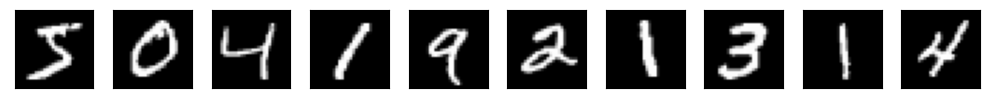

In [34]:
features = np.array(images)
features = features.reshape(features.shape[0], 28,28)

fig = plt.figure(figsize=(10,10))

for i in range(10):
    fig.add_subplot(1, 10, i+1)
    
    plt.imshow(features[i], cmap = 'gray')
    
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    

Det er ganske enkelt for oss mennesker å gjenkjenne disse individuelle sifrene – selv om håndskriften kan være vanskelig å tyde. Nå vil vi se hvor godt K-gjennomsnittsalgoritmen klarer å finne struktur i disse dataene.

### Problem 3a) (2P)

  (i) Hvor mange bilder har vi i datasettet?  

  (ii) Hvilket siffer ligner det 50. bildet i datasettet vårt på? Lag et plott som viser dette sifferet. (Husk at Python begynner nummereringen med 0, og derfor refereres det 50. bildet til [49])

 
###   <font color='red'>Løsning:</font> Svar på svararket.

## Klyngeanalyse med $K$-gjennomsnitt

La oss nå endelig utføre $K$-gjennomsnittalgoritme. Vi må gå gjennom følgende steg:

  1. Angi antall klynger du ønsker
  2. Initialiser $K$-gjennomsnitt-modellen
  3. Tilpass $K$-gjennomsnitt-modellen

Vi bruker 𝐾-gjennomsnittsfunksjonen med $K=10$ (se kode under), fordi vi håper jo å finne igjen de 10 sifferene (0-9) som klyngene.

I tillegg kan vi få tilgang til sentroidene i klyngene våre i tabellen `means.cluster_centers_`, og plotte dem for å se hvordan algoritmen mener det typiske bildet i hver av de 10 gruppene ser ut.


Hint: Her kan du lese litt mer om KMeans-funksjonen: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

In [35]:
# kodechunk kmeans

# Steg 1: Antall klynger
antall_klynger = 10

# Steg 2: Initaliser k-means algoritmen
kmeans = KMeans(n_clusters = antall_klynger, random_state = 1,n_init=10)

# Steg 3: Tilpass modellen
kmeans.fit(images)

# sentroidene (a)
sentroider = kmeans.cluster_centers_

### Problem 3b) (3P)


 (i) Tegn sentroidene av de 10 klyngene fra $K$-gjennomsnitt modellen. Tilpass koden oppover (ovenfor problem 3a).
 
 (ii) Synes du at grupperingen i klynger er relevant og nyttig? Forklar. Maks 3 setninger. 

 (iii) Vi har valgt $K=10$ for dette eksempelet fordi vi hadde håpet å finne klynger som representerer de 10 sifferene 0-9. Men generelt er $K$ vilkårlig. Kom opp med en forslåg for hvordan man (generelt, ikke nødvendigvis her) kan best velge $K$. (Se her, for eksempel: https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb). Beskriv i egne ord med maks 3 setninger! 
 
###   <font color='red'>Løsning:</font> Svar på svararket.  (Gjerne også kopier et bilde av koden og resultatet fra jupyter notebooken.)

## Hierarkisk klyngeanalyse

Vi fortsetter nå med å bruke hierarkisk klyngeanalyse for *mnist* datasettet. Vi gjør *Agglomerative Clustering* ved bruk av `sklearn.cluster` pakken. (Agglomerative Clustering er noe vi har lært om i undervisningen, men se også her hvis du har lyst til å vite mer: https://en.wikipedia.org/wiki/Hierarchical_clustering)

 
Siden hierarkisk gruppering er tregt for store datasett, spesielt for grafiske data, ble et tilfeldig utvalg på 20 bilder valgt fra det originale datasettet for å illustrere bruken av denne modellen.


### Problem 3c (3P):
 
(i) Vurder dendrogrammet nedenfor. Synes du at den hierarkiske grupperingsalgoritmen har laget gode og meningsfulle grupper av bildene?

(ii) I koden under har vi brukt gjennomsnittskobling  (`method = 'average'`). Hvordan fungerer gjennomsnittskobling? Maks 2 setninger!

(iii) Velg en annen måte å koble klyngene sammen på (vi har lært om dette i undervisningen) og lag et nytt dendrogram ved å tilpasse koden nedenfor. Kommenter resultatene: Ser det bedre eller verre ut?


###   <font color='red'>Løsning:</font> Svar på svararket.  (Gjerne også kopier et bilde av koden og resultatet fra jupyter notebooken.)

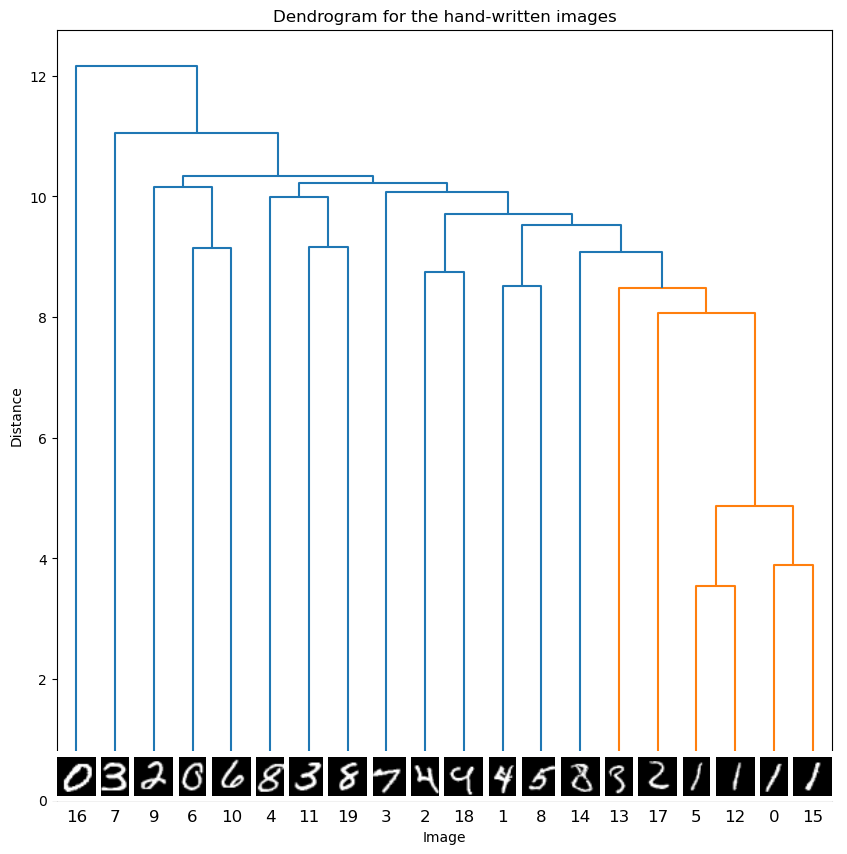

In [36]:
##Cluster

n_image = 20

sample = images.sample(n = n_image, random_state = 1)

sampleimg = np.array(sample).reshape(sample.shape[0], 28,28)

plt.figure(figsize=(10,10))
ax = plt.subplot()

# Bruk gjennomsnittskobling (method='average')
link = linkage(y = sample, method = 'average', metric = 'euclidean')

dendro = dendrogram(link)

dcoord = np.array(dendro["dcoord"])
icoord = np.array(dendro["icoord"])
leaves = np.array(dendro["leaves"])

idx = np.argsort(dcoord[:, 2])

dcoord = dcoord[idx, :]
icoord = icoord[idx, :]

idx = np.argsort(link[:, :2].ravel())
label_pos = icoord[:, 1:3].ravel()[idx][:n_image]

for i in range(n_image):
    imagebox = OffsetImage(sampleimg[i], cmap = 'gray', interpolation = "bilinear")
    ab = AnnotationBbox(imagebox, (label_pos[i], 0),  box_alignment=(0.5, -0.1), 
                        bboxprops={"edgecolor" : "none"})
    ax.add_artist(ab)

plt.title('Dendrogram for the hand-written images')
plt.xlabel('Image')
plt.ylabel('Distance')
plt.show()


### Problem 3d) (2P)

 
(i) Med tanke på at verken de 10 klyngene funnet med $K$-gjennomsnittsalgoritmen, eller med hierarkisk klyngeanalyse, ser ut til å representere de 10 sifferene 0-9 veldig godt, tror du at klyngeanalyse (som er en ikke-veiledet metode) var en god metode for å bruke her? 

(ii) Hvilke andre metode vil du anbefale når målet er å klassifisere (predikere) siffer fra et håndskrevet tall?

###   <font color='red'>Løsning:</font>  Svar på svararket.